**Import Python Preliminaries**

In [1]:
import os
import sys
import pandas as pd
from pathlib import Path
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import optax

**Import nndp Functions**

In [2]:
PATH = Path(os.getcwd())
sys.path.append(str(PATH).replace('examples/income_fluctuations', ''))
from policy_function import make_policy_function
from core import train, simulate

**Import Functions and Model Parameters from Income Fluctuations Example**

In [3]:
from model import u, m, Gamma, F, policy, T

**Initialize Policy Function**

In [4]:
key = jax.random.PRNGKey(0)
params, policy = make_policy_function(policy = policy,
                                      Gamma = Gamma,
                                      key = key,
                                      K = 3,
                                      P = 1,
                                      N_nodes = 128,
                                      N_hidden = 3,
                                      f_activation = jax.nn.tanh,
                                      f_outputs = [jax.nn.sigmoid]
                                      )

**Train Policy Function**

In [5]:
params = train(key = key,
               params = params,
               policy = policy,
               u = u,
               m = m,
               F = F,
               T = T,
               N_simul = 1,
               batch_size = 250,
               N_iter = 100,
               optimizer = optax.adam(1e-3)
               )

Objective value on training iteration 99 out of 100: -87.92192840576172

**Plot Policy Function**

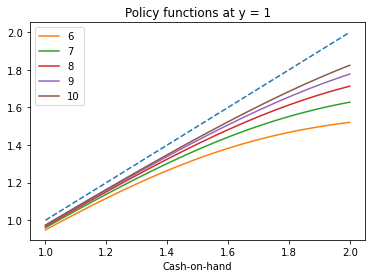

In [6]:
fig, ax = plt.subplots()
a = jnp.linspace(0,1)
y_plot = 1
ax.plot(a + y_plot, a + y_plot, ls = '--')
for t in range(T-4, T+1):
    s = jnp.column_stack(([t] * len(a), [y_plot] * len(a), a))
    ax.plot(a + y_plot, policy(s, params), label = f'{t}')
ax.legend()
ax.set(xlabel='Cash-on-hand')
ax.set(title=f'Policy functions at y = {y_plot}')
plt.show()

**Simulate Paths of Individuals Given Policy Function**

In [7]:
s0 = F(key = key, N = 100)
results = simulate(key = key,
                   policy = policy,
                   params = params,
                   u = u,
                   m = m,
                   s0 = s0,
                   T = T)
results = pd.DataFrame(results, columns = ['id', 't', 'y', 'a', 'c', 'v'])
results.to_csv('simulation_results.csv', index = False)